In [1]:
import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

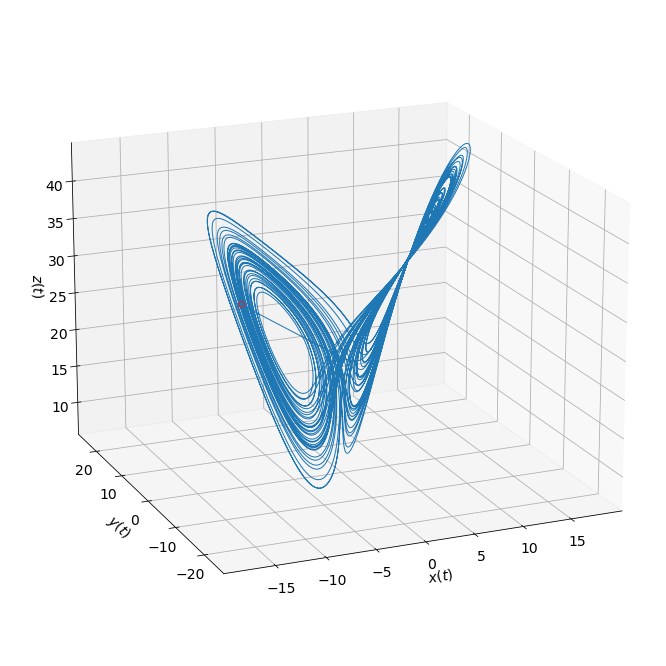

In [2]:
# Figure 7.1

# Simulate the Lorenz System
tstart, tstop = 0, 50
dt = 0.001
timepoints = np.arange(tstart, tstop + dt, dt)

σ, ρ, β = 10, 28, 8/3
x_0 = (-8, 8, 27)

def lorenz(t, x_t, σ=σ, ρ=ρ, β=β):
    """Lorenz differential equation, returns LHS (derivatives) at a point `x_t`."""
    x, y, z = x_t
    return σ*(y - x), x*(ρ - z) - y, x*y - β*z

x = solve_ivp(lorenz, (tstart, tstop), x_0, t_eval=timepoints).y.T
dx_dt = np.array([lorenz(0, x_t) for x_t in x])

fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(12, 12))
ax.plot(*x.T, linewidth=1)
ax.plot(*x_0, 'o', color='C3', fillstyle='none')
ax.set_xlabel('$x(t)$')
ax.set_ylabel('$y(t)$')
ax.set_zlabel('$z(t)$')
ax.view_init(18, -113)